__Calculating Hurst Exponent__

In [62]:
import math
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from scipy import stats

In [76]:
# Calculating Hurst Exponent

base = 10
power = 8

randomSequence = np.random.rand(1, base**power)
logS, logN, steps = [0,], [0,], [base**(i+1) for i in range(power)]

for step in steps:
    logS.append( math.log( ((randomSequence[0,0:step].max() - randomSequence[0,0:step].min()) / (randomSequence[0,0:step].std()))) + logS[-1] ) 
    logN.append( math.log(step) )

# Calculating the Slope
slope, intercept, r_value, p_value, std_err = stats.linregress(logN,logS)
linear = np.polyval([slope, intercept], logN)

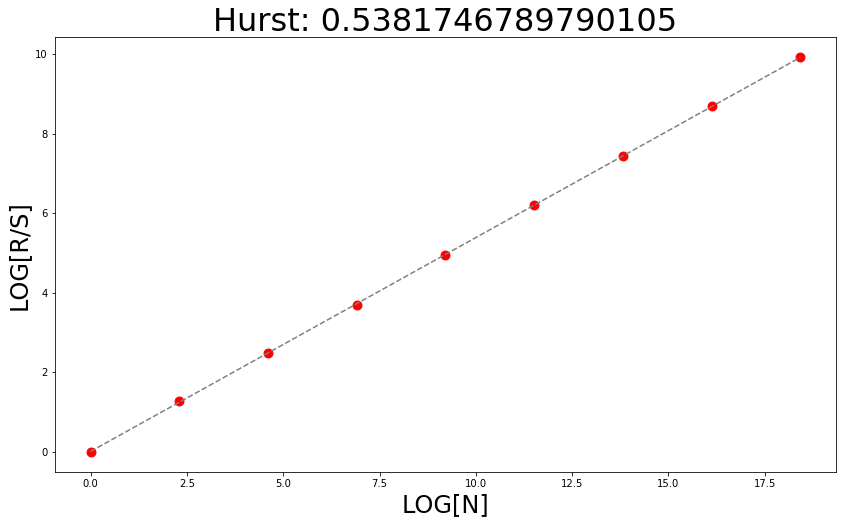

In [72]:
# Plotting
plt.figure('Hurst', figsize=(14,8))
plt.title('Hurst: '+ str(slope), fontsize=32)
plt.scatter(logN, logS, s=80, color='red')
plt.plot(logN, linear, '--', color='gray')
plt.xlabel('LOG[N]', fontsize=24)
plt.ylabel('LOG[R/S]', fontsize=24)
plt.show()